#### EDA Case Study

**Objective :**

Perform the Exploratory Data Analysis on the Telecom Churn data. 

**Instructions**

1. Answer the given questions
2. Submit your work in Jupyter Notebook and in HTML format with all the results.(filename: yourname_EDA_1)



####  Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load the data set telecom_churn

In [2]:
df=pd.read_csv('telecom_churn.csv',encoding ='latin1')
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Look at data dimensionality, feature names, and feature types.

In [3]:
df.shape

(3333, 20)

Write how many rows and columns you have identified

Now print the column names

In [4]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

check the info of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

 **change the column type** with the `astype` method, and apply this method to the `Churn` feature to convert it into `int64`:

In [6]:
df['Churn'] = df['Churn'].astype("int64")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Describe the numerical feature

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


Describe categorical feature

In [9]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object

Let's have a look at the distribution of `Churn`:

In [10]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

Identify how many loyal customers and it's percentage

In [11]:
df['Churn'].value_counts( normalize=True)*100

0    85.508551
1    14.491449
Name: Churn, dtype: float64


### Sorting

Sort by *Total day charge* (use `ascending=False` to sort in descending order):


In [12]:
x=df.sort_values(by ="Total day charge",ascending = False)
x

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,WI,70,415,No,No,0,7.9,100,1.34,136.4,83,11.59,156.6,89,7.05,12.1,1,3.27,0,0
2753,OH,134,415,No,No,0,7.8,86,1.33,171.4,100,14.57,186.5,80,8.39,12.9,2,3.48,2,0
2736,OK,127,510,No,Yes,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0
1397,VT,101,510,No,No,0,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0


sort by multiple columns:'Churn', 'Total day charge'

In [13]:
x=df.sort_values(by = ['Churn','Total day charge'])
x

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1397,VT,101,510,No,No,0,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0
2736,OK,127,510,No,Yes,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0
2753,OH,134,415,No,No,0,7.8,86,1.33,171.4,100,14.57,186.5,80,8.39,12.9,2,3.48,2,0
1986,WI,70,415,No,No,0,7.9,100,1.34,136.4,83,11.59,156.6,89,7.05,12.1,1,3.27,0,0
1052,OR,98,415,Yes,No,0,12.5,67,2.13,256.6,90,21.81,169.4,88,7.62,7.7,9,2.08,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1


### Indexing and retrieving data
**what is the proportion of churned users in our dataframe?**

In [14]:
df['Churn'].mean()

0.14491449144914492


**What are average values of numerical features for churned users?**

In [15]:
df[df['Churn']==1].mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19568\1727584415.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Churn']==1].mean()


Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

**How much time (on average) do churned users spend on the phone during daytime?**

In [16]:
df[df['Churn']==1]['Total day minutes'].mean()

206.91407867494814


**What is the maximum length of international calls among loyal users (`Churn == 0`) who do not have an international plan?**



In [17]:
df[(df['Churn']==0) & (df['International plan']== 'No')]['Total intl minutes'].max()

18.9

select and display 5 rows for State and Area code

In [18]:
#Using loc

df.loc[0:5,['State','Area code']]

,State,Area code
0,KS,415
1,OH,415
2,NJ,415
3,OH,408
4,OK,415
5,AL,510


In [19]:
#Using iloc

df.iloc[0:5,[0,2]]

,State,Area code
0,KS,415
1,OH,415
2,NJ,415
3,OH,408
4,OK,415


Display lastline in the daframe

In [20]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0



### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**

Use apply to find the max value for each feature


In [21]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

Get all the states whose name starts with "W"

In [22]:
x=df[df["State"].apply(lambda state:state[0]=="W")]
x

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,WI,87,415,No,No,0,238.0,97,40.46,164.5,97,13.98,282.5,132,12.71,10.6,6,2.86,2,0
3303,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
3319,WY,89,415,No,No,0,115.4,99,19.62,209.9,115,17.84,280.9,112,12.64,15.9,6,4.29,3,0
3324,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0


For international plan feature replace No with False and Yes with True

In [23]:
dict_={"Yes":True,"No":False}
df['International plan']=df['International plan'].map(dict_)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


The same thing can be done with the `replace` method:

In [24]:
dict_={"Yes":True,"No":False}
df.replace({'International plan': dict_})
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,False,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,False,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,False,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,True,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0



### Grouping


Group by churn and get the stats for 'Total day minutes', 'Total eve minutes', 'Total night minutes'

In [25]:
x =['Total day minutes', 'Total eve minutes', 'Total night minutes']
df.groupby(['Churn'])[x].describe(percentiles=[]).T

Churn                                0           1
Total day minutes   count  2850.000000  483.000000
                    mean    175.175754  206.914079
                    std      50.181655   68.997792
                    min       0.000000    0.000000
                    50%     177.200000  217.600000
                    max     315.600000  350.800000
Total eve minutes   count  2850.000000  483.000000
                    mean    199.043298  212.410145
                    std      50.292175   51.728910
                    min       0.000000   70.900000
                    50%     199.600000  211.300000
                    max     361.800000  363.700000
Total night minutes count  2850.000000  483.000000
                    mean    200.133193  205.231677
                    std      51.105032   47.132825
                    min      23.200000   47.400000
                    50%     200.250000  204.800000
                    max     395.000000  354.900000

Do using `agg()`:

In [26]:
x =['Total day minutes', 'Total eve minutes', 'Total night minutes']

df.groupby(['Churn'])[x].agg([np.mean, np.std, np.min, np.max]).T

Churn                              0           1
Total day minutes   mean  175.175754  206.914079
                    std    50.181655   68.997792
                    amin    0.000000    0.000000
                    amax  315.600000  350.800000
Total eve minutes   mean  199.043298  212.410145
                    std    50.292175   51.728910
                    amin    0.000000   70.900000
                    amax  361.800000  363.700000
Total night minutes mean  200.133193  205.231677
                    std    51.105032   47.132825
                    amin   23.200000   47.400000
                    amax  395.000000  354.900000


### Summary tables
Build a **contingency table** using the `crosstab` method: For 'International plan' and Churn



In [27]:
x=pd.crosstab(df['Churn'],df['International plan']).T
x

Churn,0,1
International plan,,
False,2664,346
True,186,137


In [28]:
x=pd.crosstab(df['Churn'],df['Voice mail plan'], margins=True,normalize= True).T
x

Churn,0,1,All
Voice mail plan,,,
No,0.602460,0.120912,0.723372
Yes,0.252625,0.024002,0.276628
All,0.855086,0.144914,1.000000


check the average number of day, evening, and night calls by area code:

In [40]:
x=df.pivot_table(['Total day calls','Total eve calls','Total night calls'],["Area code"],aggfunc='mean')
x

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190



### Feature Adding

calculate the total number of calls for all users, and create the `total_calls` Series and paste it into the DataFrame:



In [30]:
df['Total calls'] =(df['Total day calls']+df['Total eve calls']+df['Total night calls']+ df['Total intl calls'])
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,False,Yes,36,156.2,77,26.55,215.5,...,18.32,279.1,83,12.56,9.9,6,2.67,2,0,292
3329,WV,68,415,False,No,0,231.1,57,39.29,153.4,...,13.04,191.3,123,8.61,9.6,4,2.59,3,0,239
3330,RI,28,510,False,No,0,180.8,109,30.74,288.8,...,24.55,191.9,91,8.64,14.1,6,3.81,2,0,264
3331,CT,184,510,True,No,0,213.8,105,36.35,159.6,...,13.57,139.2,137,6.26,5.0,10,1.35,2,0,336


## 2. Visualization


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='International plan', ylabel='count'>

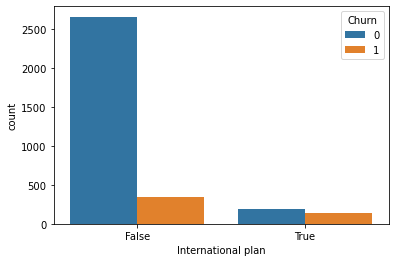

In [32]:
sns.countplot(x='International plan', hue = 'Churn', data=df)

Next, look at another important feature – *Customer service calls*. make a summary table and a picture.

In [33]:
pd.crosstab(df['Churn'],df['Customer service calls'],margins= True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

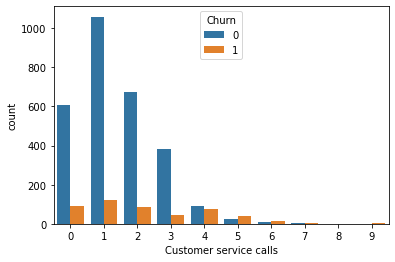

In [34]:
sns.countplot(x ='Customer service calls',hue ='Churn', data=df)


Now add a binary feature to the DataFrame – `Customer service calls > 3`. And name it 'Many service calls' after that see how it relates to churn. 

In [35]:
df['Many service calls'] = (df['Customer service calls']>3) . astype("int")
pd.crosstab(df['Many service calls'],df['Churn'],margins= True)

Churn,0,1,All
Many service calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


<AxesSubplot:xlabel='Many service calls', ylabel='count'>

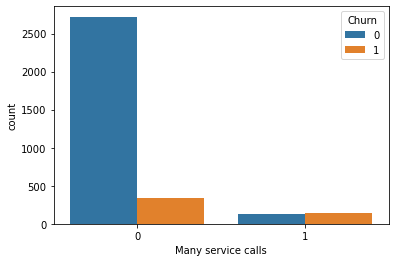

In [36]:
sns.countplot(x ='Many service calls',hue ='Churn', data=df)

Construct another contingency table that relates *Churn* with both *International plan* and freshly created *Many_service_calls*.

In [37]:
pd.crosstab(df["Many service calls"] & df["International plan"], df["Churn"])

Churn,0,1
row_0,,
False,2841,464
True,9,19


Give overall inference and which variable can used as best predictor for churn.